## 1. Importing the libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline



## 2. Loading the csv train data

In [2]:
df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTest.csv')

 ## 3. Data Inspection

In [3]:
df.shape

(1296675, 23)

In [4]:
df.sample(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1247661,1247661,2020-06-03 12:42:54,3598634130286287,"fraud_Lubowitz, Terry and Stracke",personal_care,10.00,David,Hughes,M,707 Butler Parkways Apt. 747,...,41.2064,-95.9953,518429,"Surveyor, land/geomatics",1995-10-10,04ef4020e6a43af9ceadfddced5aa5d6,1370263374,41.412622,-95.185452,0
692552,692552,2019-10-22 05:47:08,4079773899158,fraud_Beier-Hyatt,shopping_pos,17.69,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,00e0e9863431a4da252562c21c8d499f,1350884828,44.803000,-116.612754,0
1173923,1173923,2020-05-04 23:55:27,3533800906065217,"fraud_Roberts, Ryan and Smith",personal_care,5.16,Amber,Thornton,F,840 Werner Lock Apt. 852,...,40.2967,-98.7370,493,"Surveyor, minerals",1940-09-13,0af31616008fe5cccae66b9a3defbb09,1367711727,40.531474,-98.394718,0
251578,251578,2019-05-05 18:30:34,372509258176510,fraud_Pfeffer and Sons,shopping_pos,3.23,Kristen,Hanson,F,26544 Andrea Glen,...,42.9147,-83.4845,6951,Learning disability nurse,1985-06-18,0dc8896d3554caf5c2e292a4b38ac5e8,1336242634,42.943437,-82.904814,0
674813,674813,2019-10-14 13:19:33,4908846471916297,fraud_Hammes-Beatty,kids_pets,110.88,Lauren,Torres,F,03030 White Lakes,...,32.2779,-97.2351,5875,"Radiographer, therapeutic",1992-07-24,9442695410e20b934fab816cf2719eb9,1350220773,32.063093,-97.665733,0


In [5]:
df['is_fraud'].value_counts()

,count
is_fraud,
0,1289169
1,7506


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

##4. Finding Missing Values


In [7]:
print(df.describe())

         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01   
std    1.375908e+01  3.019564e+05  1.284128e+07  5.

In [8]:
print(df.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [9]:
df.duplicated().sum()

0

## 5. Analysing the correlation

In [10]:
df.corr(numeric_only=True)['is_fraud']

,is_fraud
Unnamed: 0,-0.004767
cc_num,-0.000981
amt,0.219404
zip,-0.002162
lat,0.001894
long,0.001721
city_pop,0.002136
unix_time,-0.005078
merch_lat,0.001741
merch_long,0.001721


<ipython-input-11-c996b71c5b20>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
<ipython-input-11-c996b71c5b20>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
<ipython-input-11-c996b71c5b20>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
<ipython-input-11-c996b71c5b20>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.t

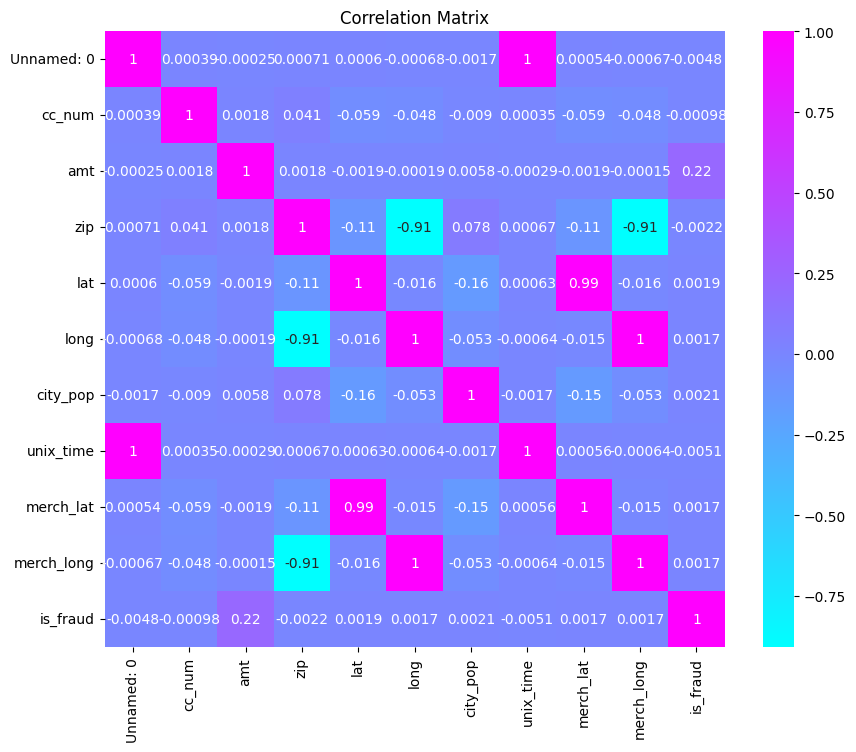

In [11]:
plt.figure(figsize=(10, 8))
for col in df.columns:
  if df[col].dtype == 'object':
    try:
      df[col] = pd.to_datetime(df[col])
    except:
      pass


sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='cool')
plt.title('Correlation Matrix')
plt.show()

5. Raw Data Visualization



Categorical


<Axes: xlabel='gender', ylabel='count'>

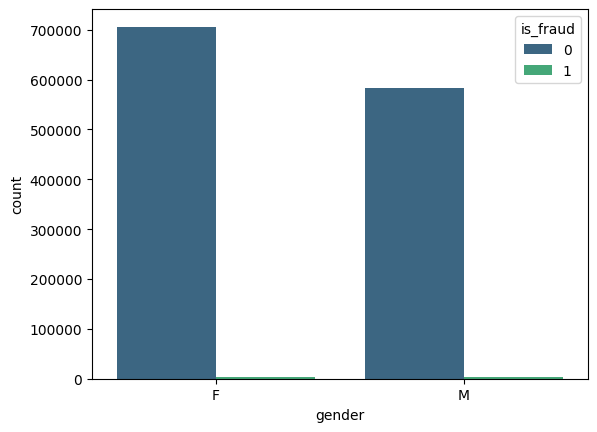

In [12]:
sns.countplot(x='gender', hue='is_fraud', data=df, palette='viridis')

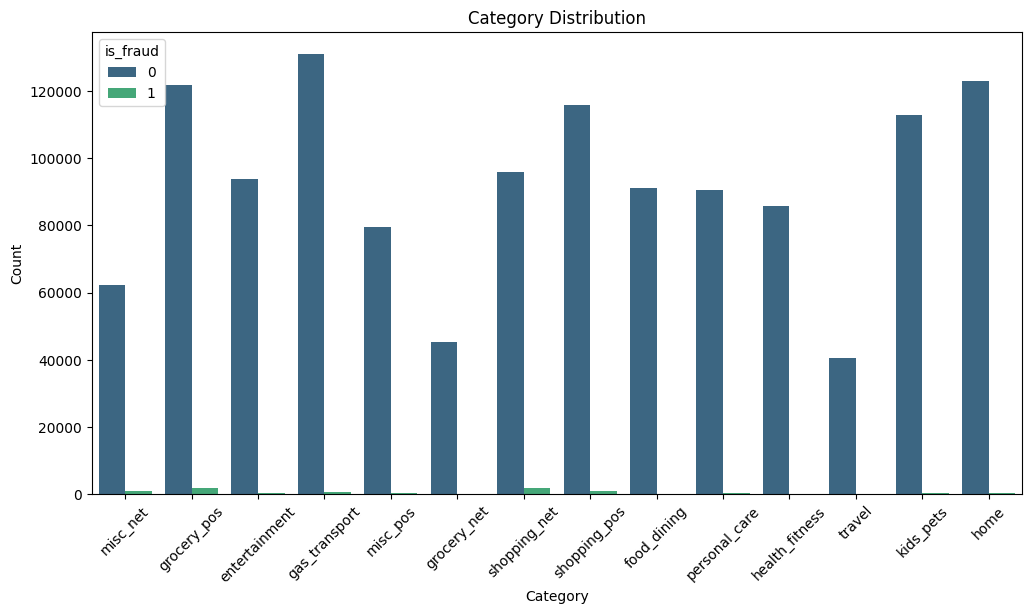

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['category'], hue=df['is_fraud'], palette='viridis')
plt.xticks(rotation=45)
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

<ipython-input-14-261c9f1fbdde>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['job'], palette='viridis')


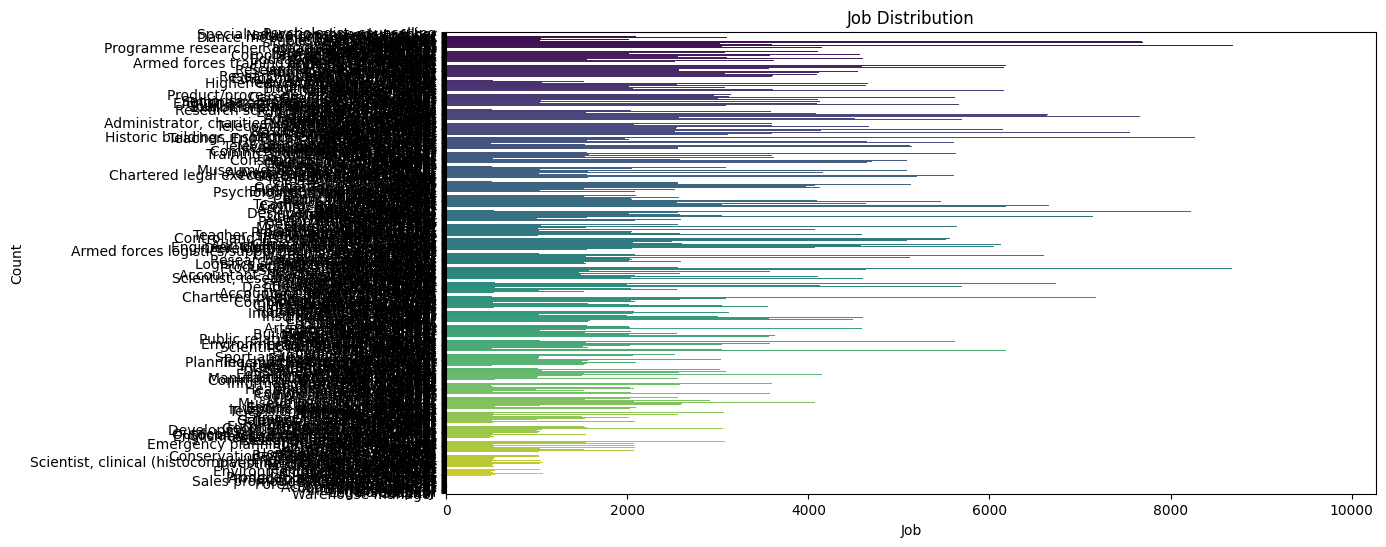

In [14]:
#### Results Show no correlation if used without extracting featureswith the target since its mostly
##different for each entery are : marchant , first, last,street, city, job
##(vo kehte hain na chor ko to bss chori karni hai they are unbiased unlike normal people)

plt.figure(figsize=(12, 6))
sns.countplot(df['job'], palette='viridis')
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()

Numerical Data Analysis

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'trans_date_trans_time'}>,
        <Axes: title={'center': 'cc_num'}>,
        <Axes: title={'center': 'amt'}>],
       [<Axes: title={'center': 'zip'}>, <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'city_pop'}>],
       [<Axes: title={'center': 'dob'}>,
        <Axes: title={'center': 'unix_time'}>,
        <Axes: title={'center': 'merch_lat'}>,
        <Axes: title={'center': 'merch_long'}>],
       [<Axes: title={'center': 'is_fraud'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

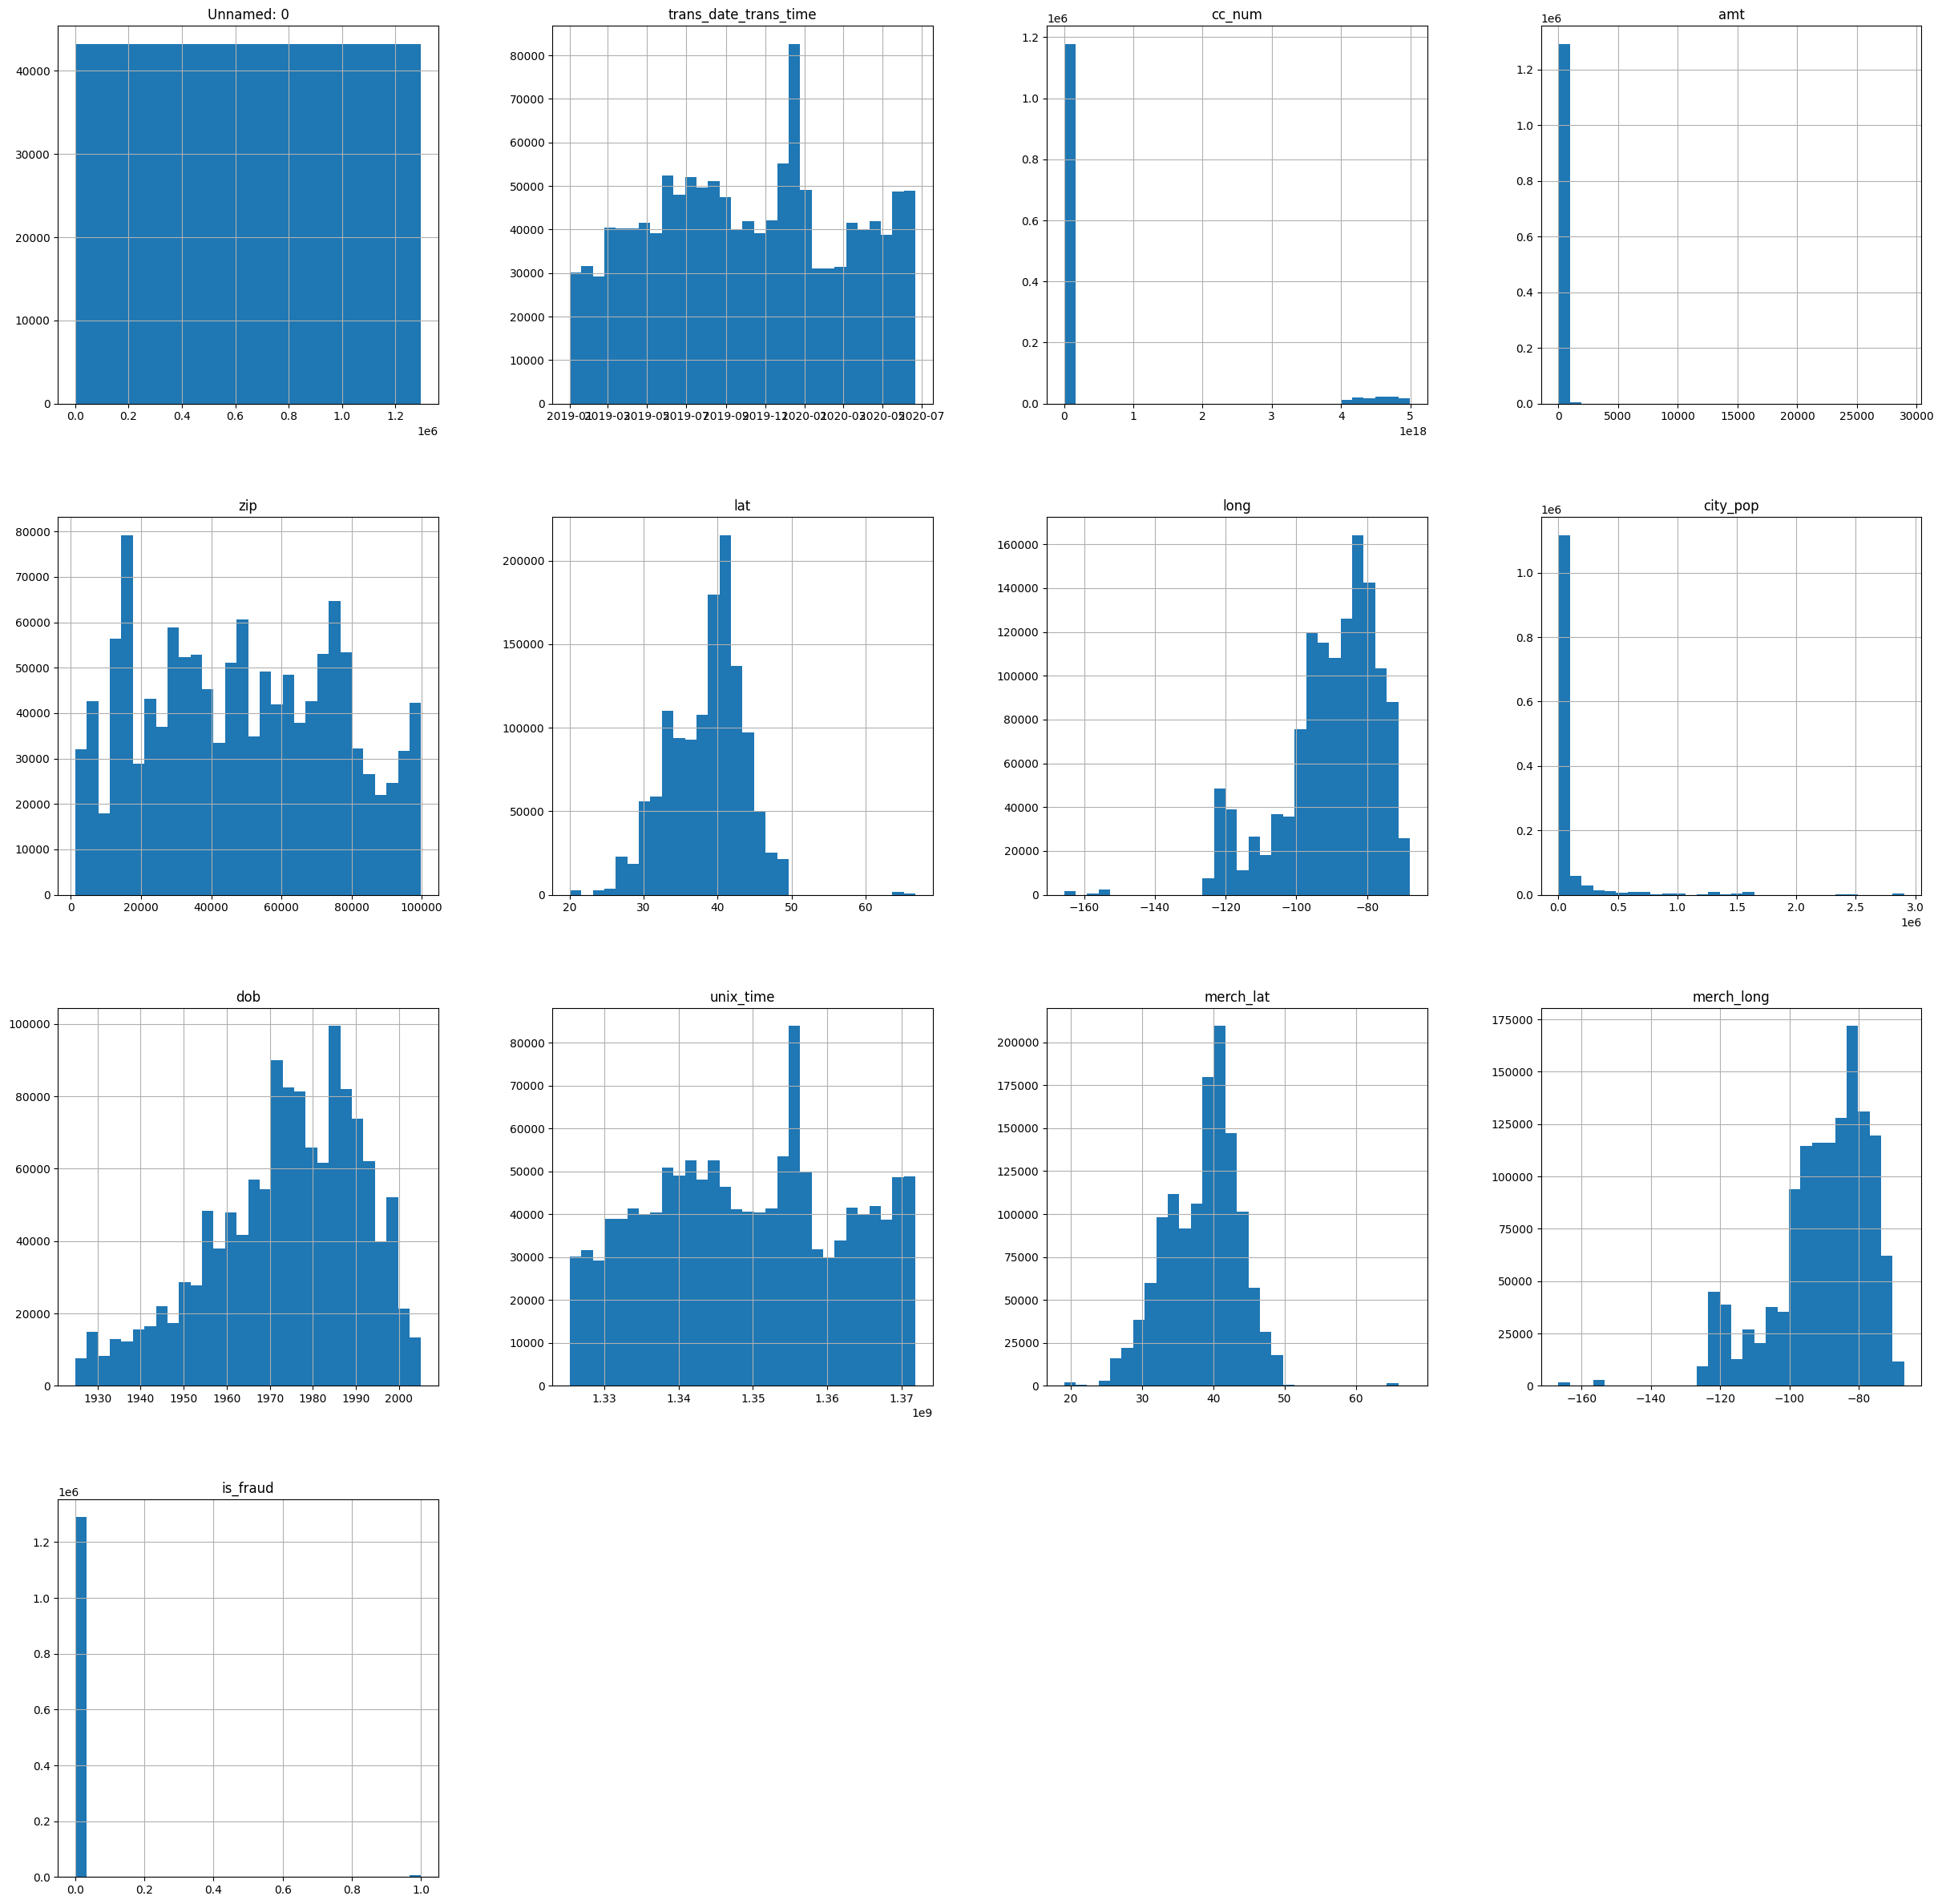

In [15]:
df.hist(bins=30, figsize=(30, 30))

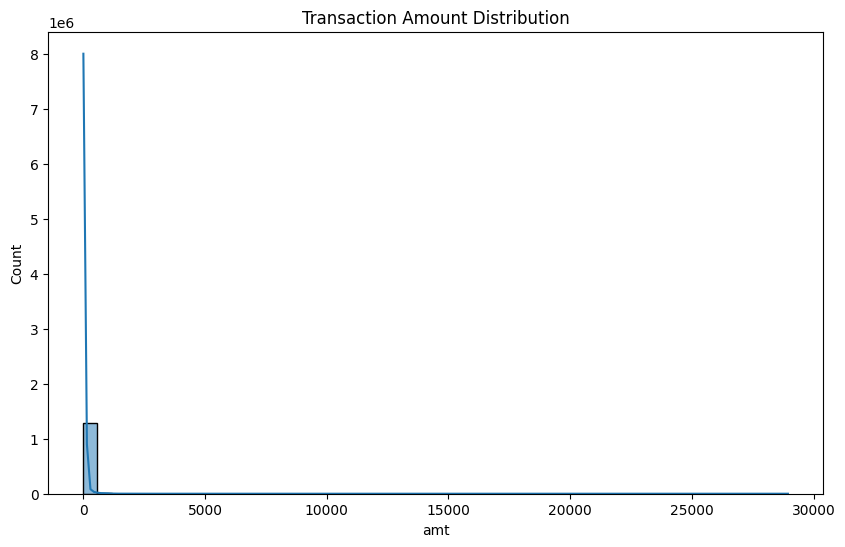

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amt'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()


<ipython-input-17-de8859d2b4a4>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['is_fraud'] == 1]['amt'], label='Fraud', shade=True)
<ipython-input-17-de8859d2b4a4>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['is_fraud'] == 0]['amt'], label='Non-Fraud', shade=True)


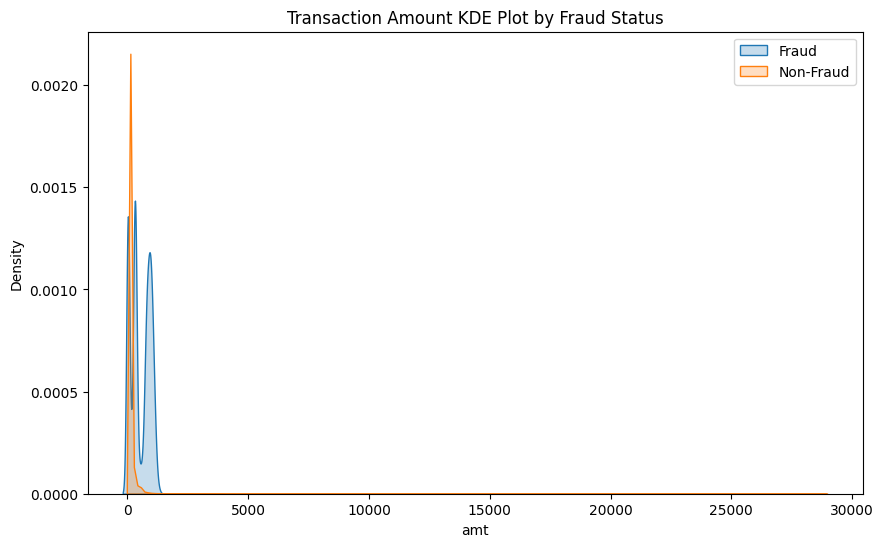

In [17]:

plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['is_fraud'] == 1]['amt'], label='Fraud', shade=True)
sns.kdeplot(df[df['is_fraud'] == 0]['amt'], label='Non-Fraud', shade=True)
plt.title('Transaction Amount KDE Plot by Fraud Status')
plt.legend()
plt.show()

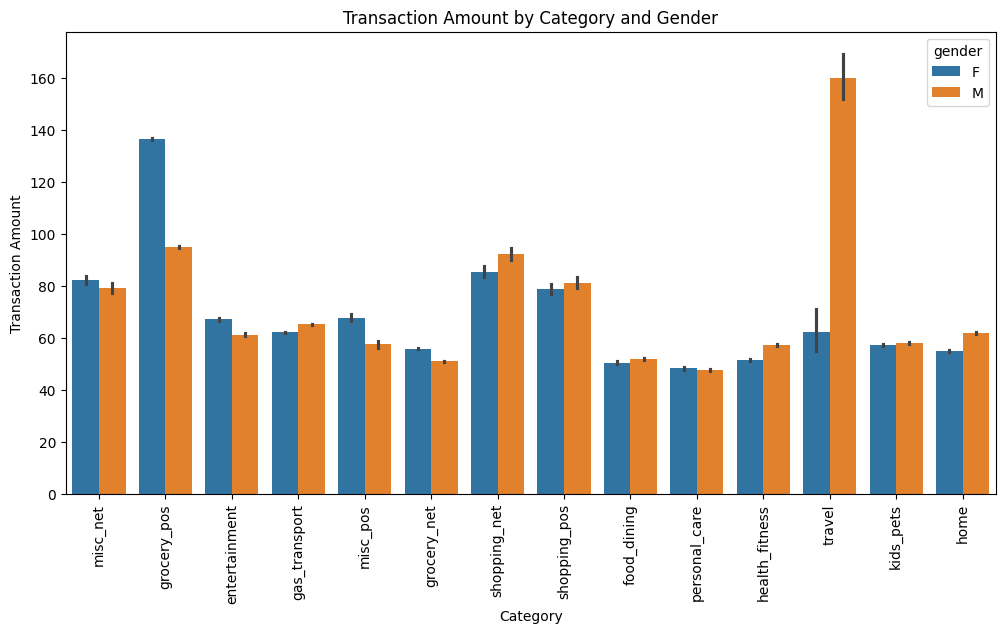

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='amt', hue='gender', data=df)
plt.title('Transaction Amount by Category and Gender')
plt.xlabel('Category')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=90)
plt.show()

## 6.Feature Engineering and Visualization



In [19]:
#making features out of trans_date_trans_time

df.loc[:, 'trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')


df = df.dropna(subset=['trans_date_trans_time'])


df.loc[:, 'trans_hour'] = df['trans_date_trans_time'].dt.hour
df.loc[:, 'trans_day'] = df['trans_date_trans_time'].dt.day
df.loc[:, 'trans_month'] = df['trans_date_trans_time'].dt.month
df.loc[:, 'trans_dayofweek'] = df['trans_date_trans_time'].dt.dayofweek
df.loc[:, 'trans_is_weekend'] = df['trans_date_trans_time'].dt.dayofweek >= 5


df[['trans_date_trans_time', 'trans_hour', 'trans_day', 'trans_month', 'trans_dayofweek', 'trans_is_weekend']].head()


,trans_date_trans_time,trans_hour,trans_day,trans_month,trans_dayofweek,trans_is_weekend
0,2019-01-01 00:00:18,0,1,1,1,False
1,2019-01-01 00:00:44,0,1,1,1,False
2,2019-01-01 00:00:51,0,1,1,1,False
3,2019-01-01 00:01:16,0,1,1,1,False
4,2019-01-01 00:03:06,0,1,1,1,False


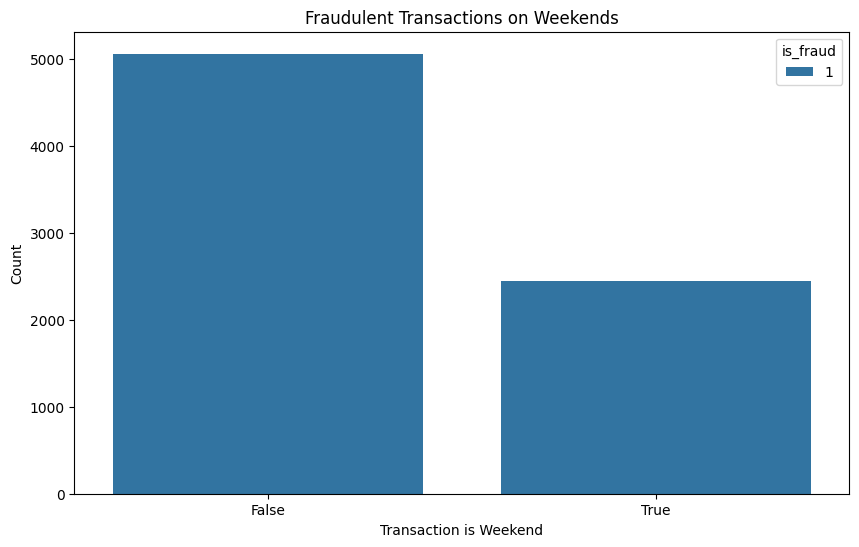

In [20]:


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='trans_is_weekend', hue='is_fraud', data=df[df['is_fraud'] == True])
plt.title('Fraudulent Transactions on Weekends')
plt.xlabel('Transaction is Weekend')
plt.ylabel('Count')
plt.show()


In [21]:

test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'], errors='coerce')


test_df = test_df.dropna(subset=['trans_date_trans_time'])


test_df.loc[:, 'trans_hour'] = test_df['trans_date_trans_time'].dt.hour
test_df.loc[:, 'trans_day'] = test_df['trans_date_trans_time'].dt.day
test_df.loc[:, 'trans_month'] = test_df['trans_date_trans_time'].dt.month
test_df.loc[:, 'trans_dayofweek'] = test_df['trans_date_trans_time'].dt.dayofweek
test_df.loc[:, 'trans_is_weekend'] = test_df['trans_date_trans_time'].dt.dayofweek >= 5


test_df[['trans_date_trans_time', 'trans_hour', 'trans_day', 'trans_month', 'trans_dayofweek', 'trans_is_weekend']].head()


,trans_date_trans_time,trans_hour,trans_day,trans_month,trans_dayofweek,trans_is_weekend
0,2020-06-21 12:14:25,12,21,6,6,True
1,2020-06-21 12:14:33,12,21,6,6,True
2,2020-06-21 12:14:53,12,21,6,6,True
3,2020-06-21 12:15:15,12,21,6,6,True
4,2020-06-21 12:15:17,12,21,6,6,True


In [22]:
#removing the skew from amt

df['amt1'] = np.log1p(df['amt'])


In [23]:
test_df['amt1'] = np.log1p(test_df['amt'])

<ipython-input-24-1554c9388404>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['is_fraud'] == 1]['amt1'], label='Fraud', shade=True)


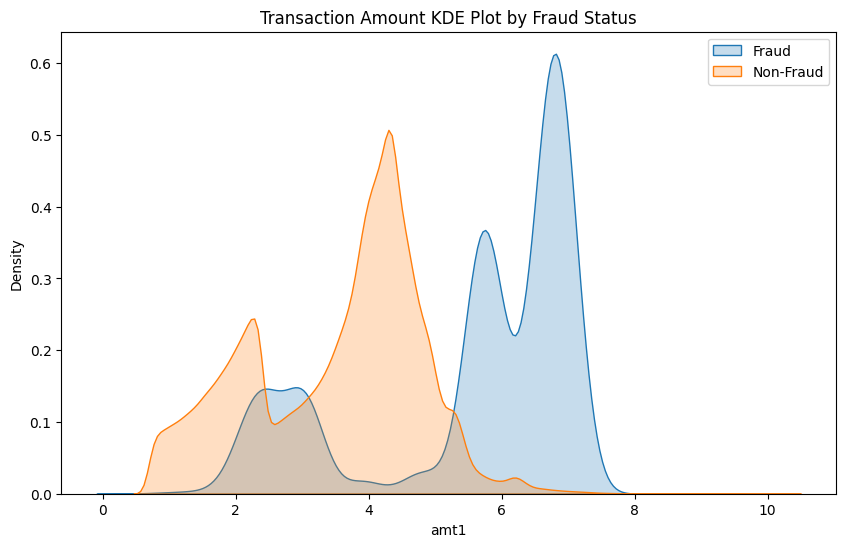

In [24]:
#KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['is_fraud'] == 1]['amt1'], label='Fraud', shade=True)
sns.kdeplot(df[df['is_fraud'] == 0]['amt1'], label='Non-Fraud', fill=True)
plt.title('Transaction Amount KDE Plot by Fraud Status')
plt.legend()
plt.show()

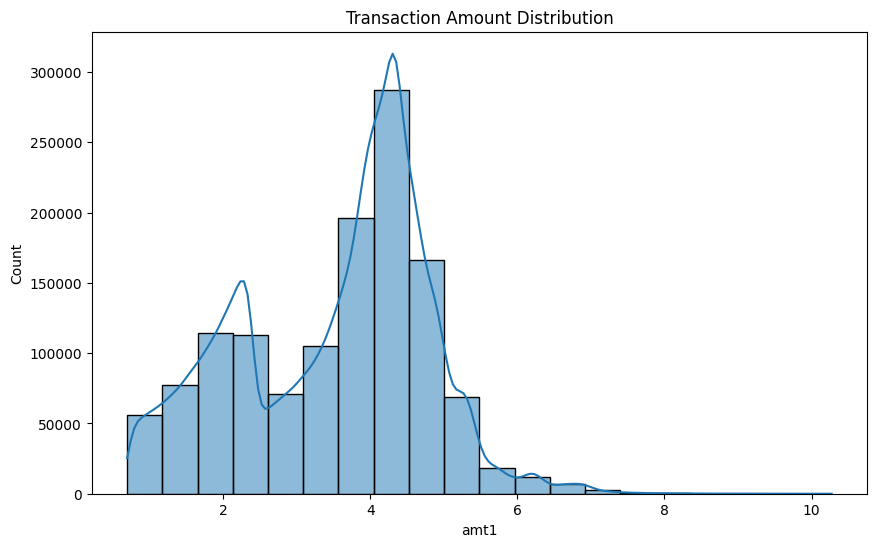

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amt1'], bins=20, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

In [26]:


import numpy as np


def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points
    on the Earth (specified in decimal degrees).
    """

    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))


    r = 6371
    return c * r

# Apply the Haversine function to calculate the customer-merchant distance
df['cust_merch_distance'] = df.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)


In [27]:
#customer to merchant distance
correlation = df['cust_merch_distance'].corr(df['is_fraud'])
print(f"Correlation between cust_merch_distance and is_fraud: {correlation}")


Correlation between cust_merch_distance and is_fraud: 0.0004027341540144967


In [28]:
test_df['cust_merch_distance'] = test_df.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

In [29]:
#transaction frequency

df['transaction_count_per_card'] = df.groupby('cc_num')['trans_num'].transform('count')


In [30]:
test_df['transaction_count_per_card'] = test_df.groupby('cc_num')['trans_num'].transform('count')

In [31]:
df['dob'] = pd.to_datetime(df['dob'])


df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Calculate age
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year


df['age'] -= (df['trans_date_trans_time'].dt.month < df['dob'].dt.month) | (
    (df['trans_date_trans_time'].dt.month == df['dob'].dt.month) & (df['trans_date_trans_time'].dt.day < df['dob'].dt.day)
)

In [32]:

test_df['dob'] = pd.to_datetime(test_df['dob'])


test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])


test_df['age'] = test_df['trans_date_trans_time'].dt.year - test_df['dob'].dt.year


test_df['age'] -= (test_df['trans_date_trans_time'].dt.month < test_df['dob'].dt.month) | (
    (test_df['trans_date_trans_time'].dt.month == test_df['dob'].dt.month) &
    (test_df['trans_date_trans_time'].dt.day < test_df['dob'].dt.day)
)

In [33]:
#encoding gender
df['gender'] = df['gender'].map({'M': 1, 'F': 0})


In [34]:
#encoding gender
test_df['gender'] = test_df['gender'].map({'M': 1, 'F': 0})


In [35]:
#encoding gender
df['trans_is_weekend'] = df['trans_is_weekend'].map({True: 1, False: 0})


In [36]:
#encoding gender
test_df['trans_is_weekend'] = test_df['trans_is_weekend'].map({True: 1, False: 0})


In [37]:
#Transaction Velocity: Calculate the velocity of transactions over time (e.g., the number of transactions in a short period).
df['velocity'] = df.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds().fillna(0)


In [38]:
test_df['velocity'] = test_df.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds().fillna(0)

##7. Feature Selection

In [39]:
columns_to_drop = ['unix_time', 'trans_date_trans_time', 'Unnamed: 0', 'trans_num', 'cc_num', 'merchant', 'job', 'street', 'city', 'state', 'zip' , 'dob', 'first','last']
columns_to_drop_existing = [col for col in columns_to_drop if col in df.columns]

df = df.drop(columns=columns_to_drop_existing)


In [40]:
columns_to_drop = ['unix_time', 'trans_date_trans_time', 'Unnamed: 0', 'trans_num', 'cc_num', 'merchant', 'job', 'street', 'city', 'state', 'zip', 'dob', 'first', 'last']
test_df = test_df.drop(columns=columns_to_drop)

In [41]:
df.shape

(1296675, 19)

##8. Outlier detection using Z SCORE

In [42]:
features = ['amt1']

In [43]:

def detect_outliers_z_score(df, features,  threshold=3):
    """Detect unique outlier indices in specified columns of a DataFrame using Z-scores.

    This function identifies data points that are considered outliers based on the Z-score,
    which measures how many standard deviations a data point is from the mean. Outliers are
    those data points with a Z-score greater than the specified threshold."""

    outlier_set = set()

    for feature in features:
        # Calculate the Z-scores
        mean = df[feature].mean()
        std_dev = df[feature].std()
        z_scores = abs(df[feature] - mean) / std_dev

        # Adding outlier indices
        outlier_indices = df[z_scores > threshold].index
        outlier_set.update(outlier_indices)

    print("Total Outliers:", len(outlier_set))

    return sorted(outlier_set)

In [44]:
# Detecting Outliers
outlier_indices = detect_outliers_z_score(df, features, threshold=3)

# Removing Outliers
df = df.drop(index=outlier_indices, axis=0).reset_index(drop=True)


Total Outliers: 1058


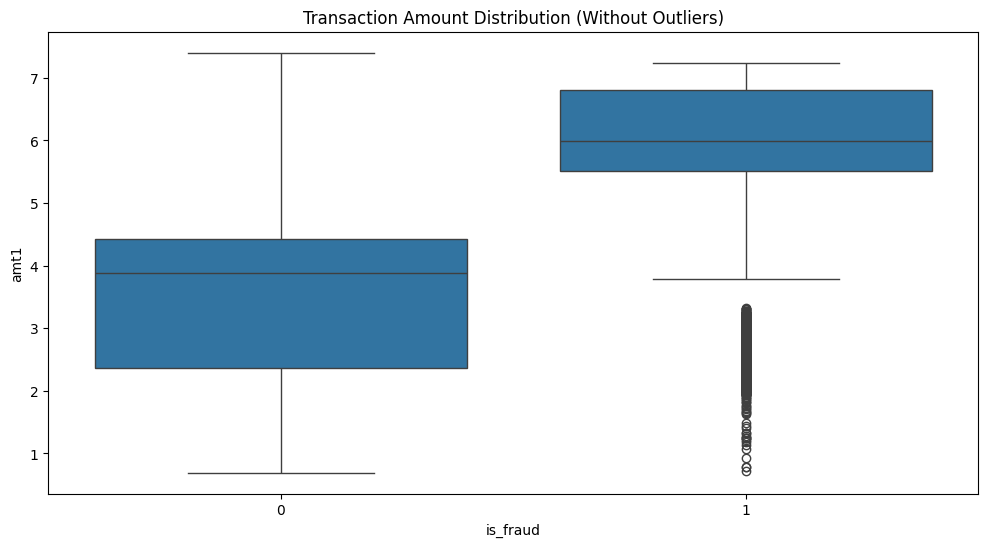

In [45]:
# Visualzing Features after removal of outlier using Z-Score
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_fraud', y='amt1', data=df)
plt.title('Transaction Amount Distribution (Without Outliers)')
plt.show()

In [46]:
features = ['amt1']

In [47]:

def detect_outliers_z_score(test_df, features,  threshold=3):


    outlier_set = set()

    for feature in features:

        mean = test_df[feature].mean()
        std_dev = test_df[feature].std()
        z_scores = abs(test_df[feature] - mean) / std_dev


        outlier_indices = test_df[z_scores > threshold].index
        outlier_set.update(outlier_indices)

    print("Total Outliers:", len(outlier_set))

    return sorted(outlier_set)

##9.Data Preprocssing Pipeline

In [48]:
numeric_features = ['city_pop', 'trans_hour', 'trans_day', 'trans_month', 'trans_dayofweek',
                    'transaction_count_per_card', 'age', 'velocity', 'lat', 'long', 'merch_lat',
                    'merch_long', 'amt1', 'cust_merch_distance']
categorical_features = ['category', 'gender']

In [49]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [50]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=True))
])

In [51]:
df[numeric_features] = numeric_transformer.fit_transform(df[numeric_features])

In [52]:
# One-hot encode the categorical features
df_encoded = pd.get_dummies(df[categorical_features], drop_first=True).astype(int)

# Dropping the original categorical columns from the dataframe
df.drop(columns=categorical_features, inplace=True)

# Concatenate the encoded columns to the original dataframe
df = pd.concat([df, df_encoded], axis=1)

In [53]:
df.shape

(1295617, 31)

In [54]:
df.sample(5)

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_hour,trans_day,trans_month,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
1177558,7.46,-3.646871,-4.734702,-0.289204,-3.630482,-4.674775,0,1.495638,-1.085950,-0.334186,...,0,0,0,0,0,0,0,1,0,0
832612,3.14,-0.422675,-0.128420,-0.288578,-0.403272,-0.086233,0,0.908983,-0.519649,1.713943,...,0,0,0,0,0,0,0,0,0,1
202132,109.16,0.720302,0.980485,-0.292417,0.808894,0.951816,0,-1.290974,-0.179868,-0.626776,...,1,0,0,0,0,0,0,0,0,0
79101,79.92,0.886031,-1.306525,-0.229861,0.991831,-1.270214,0,0.908983,0.046652,-1.211956,...,0,0,0,0,0,0,0,0,0,0
1229120,15.49,-0.587064,0.942654,-0.274589,-0.632612,0.973736,0,0.468991,1.405775,-0.334186,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df['is_fraud'].value_counts()

,count
is_fraud,
0,1288111
1,7506


In [56]:
# One-hot encode the categorical features
df_encoded1 = pd.get_dummies(test_df[categorical_features], drop_first=True).astype(int)

# Dropping the original categorical columns from the dataframe
test_df.drop(columns=categorical_features, inplace=True)

# Concatenate the encoded columns to the original dataframe
test_df = pd.concat([test_df, df_encoded1], axis=1)

In [57]:
test_df.shape

(555719, 31)

In [58]:

X_train = df.drop(columns='is_fraud')
y_train = df['is_fraud']
X_test = test_df.drop(columns='is_fraud')
y_test = test_df['is_fraud']

## 10.Decision Tree

In [59]:
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             precision_score,
                             recall_score,
                             RocCurveDisplay,
                             precision_recall_curve,
                             average_precision_score,
                             roc_auc_score,
                             roc_curve, auc, confusion_matrix,classification_report)

In [60]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth =7, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

0.977202507022434


Text(50.722222222222214, 0.5, 'Actual')

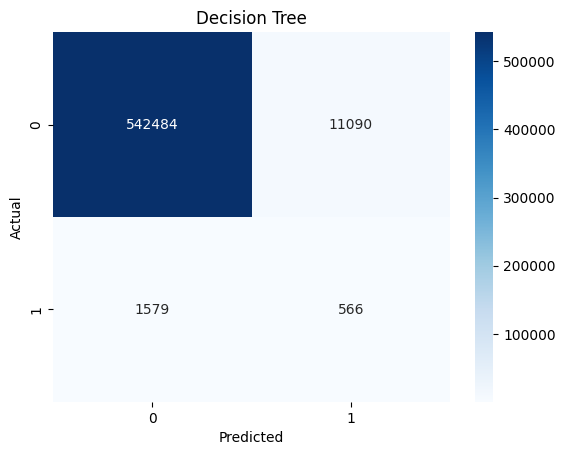

In [61]:
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(acc_dt)
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', fmt='g')
plt.title('Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [62]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.05      0.26      0.08      2145

    accuracy                           0.98    555719
   macro avg       0.52      0.62      0.54    555719
weighted avg       0.99      0.98      0.98    555719



In [63]:
from sklearn.tree import plot_tree

[Text(0.44040697674418605, 0.9375, 'x[0] <= 712.97\ngini = 0.012\nsamples = 1295617\nvalue = [1288111, 7506]'),
 Text(0.21608527131782945, 0.8125, 'x[13] <= -2.119\ngini = 0.006\nsamples = 1287765\nvalue = [1283608, 4157]'),
 Text(0.20833333333333334, 0.6875, 'gini = 0.0\nsamples = 354\nvalue = [0, 354]'),
 Text(0.2238372093023256, 0.6875, 'x[0] <= 259.04\ngini = 0.006\nsamples = 1287411\nvalue = [1283608, 3803]'),
 Text(0.1182170542635659, 0.5625, 'x[6] <= 1.276\ngini = 0.003\nsamples = 1259902\nvalue = [1258117, 1785]'),
 Text(0.06201550387596899, 0.4375, 'x[6] <= -1.364\ngini = 0.002\nsamples = 1132312\nvalue = [1131367, 945]'),
 Text(0.031007751937984496, 0.3125, 'x[11] <= -0.241\ngini = 0.008\nsamples = 165509\nvalue = [164844, 665]'),
 Text(0.015503875968992248, 0.1875, 'x[18] <= 0.5\ngini = 0.031\nsamples = 40128\nvalue = [39504, 624]'),
 Text(0.007751937984496124, 0.0625, 'gini = 0.007\nsamples = 39631\nvalue = [39484, 147]'),
 Text(0.023255813953488372, 0.0625, 'gini = 0.077\n

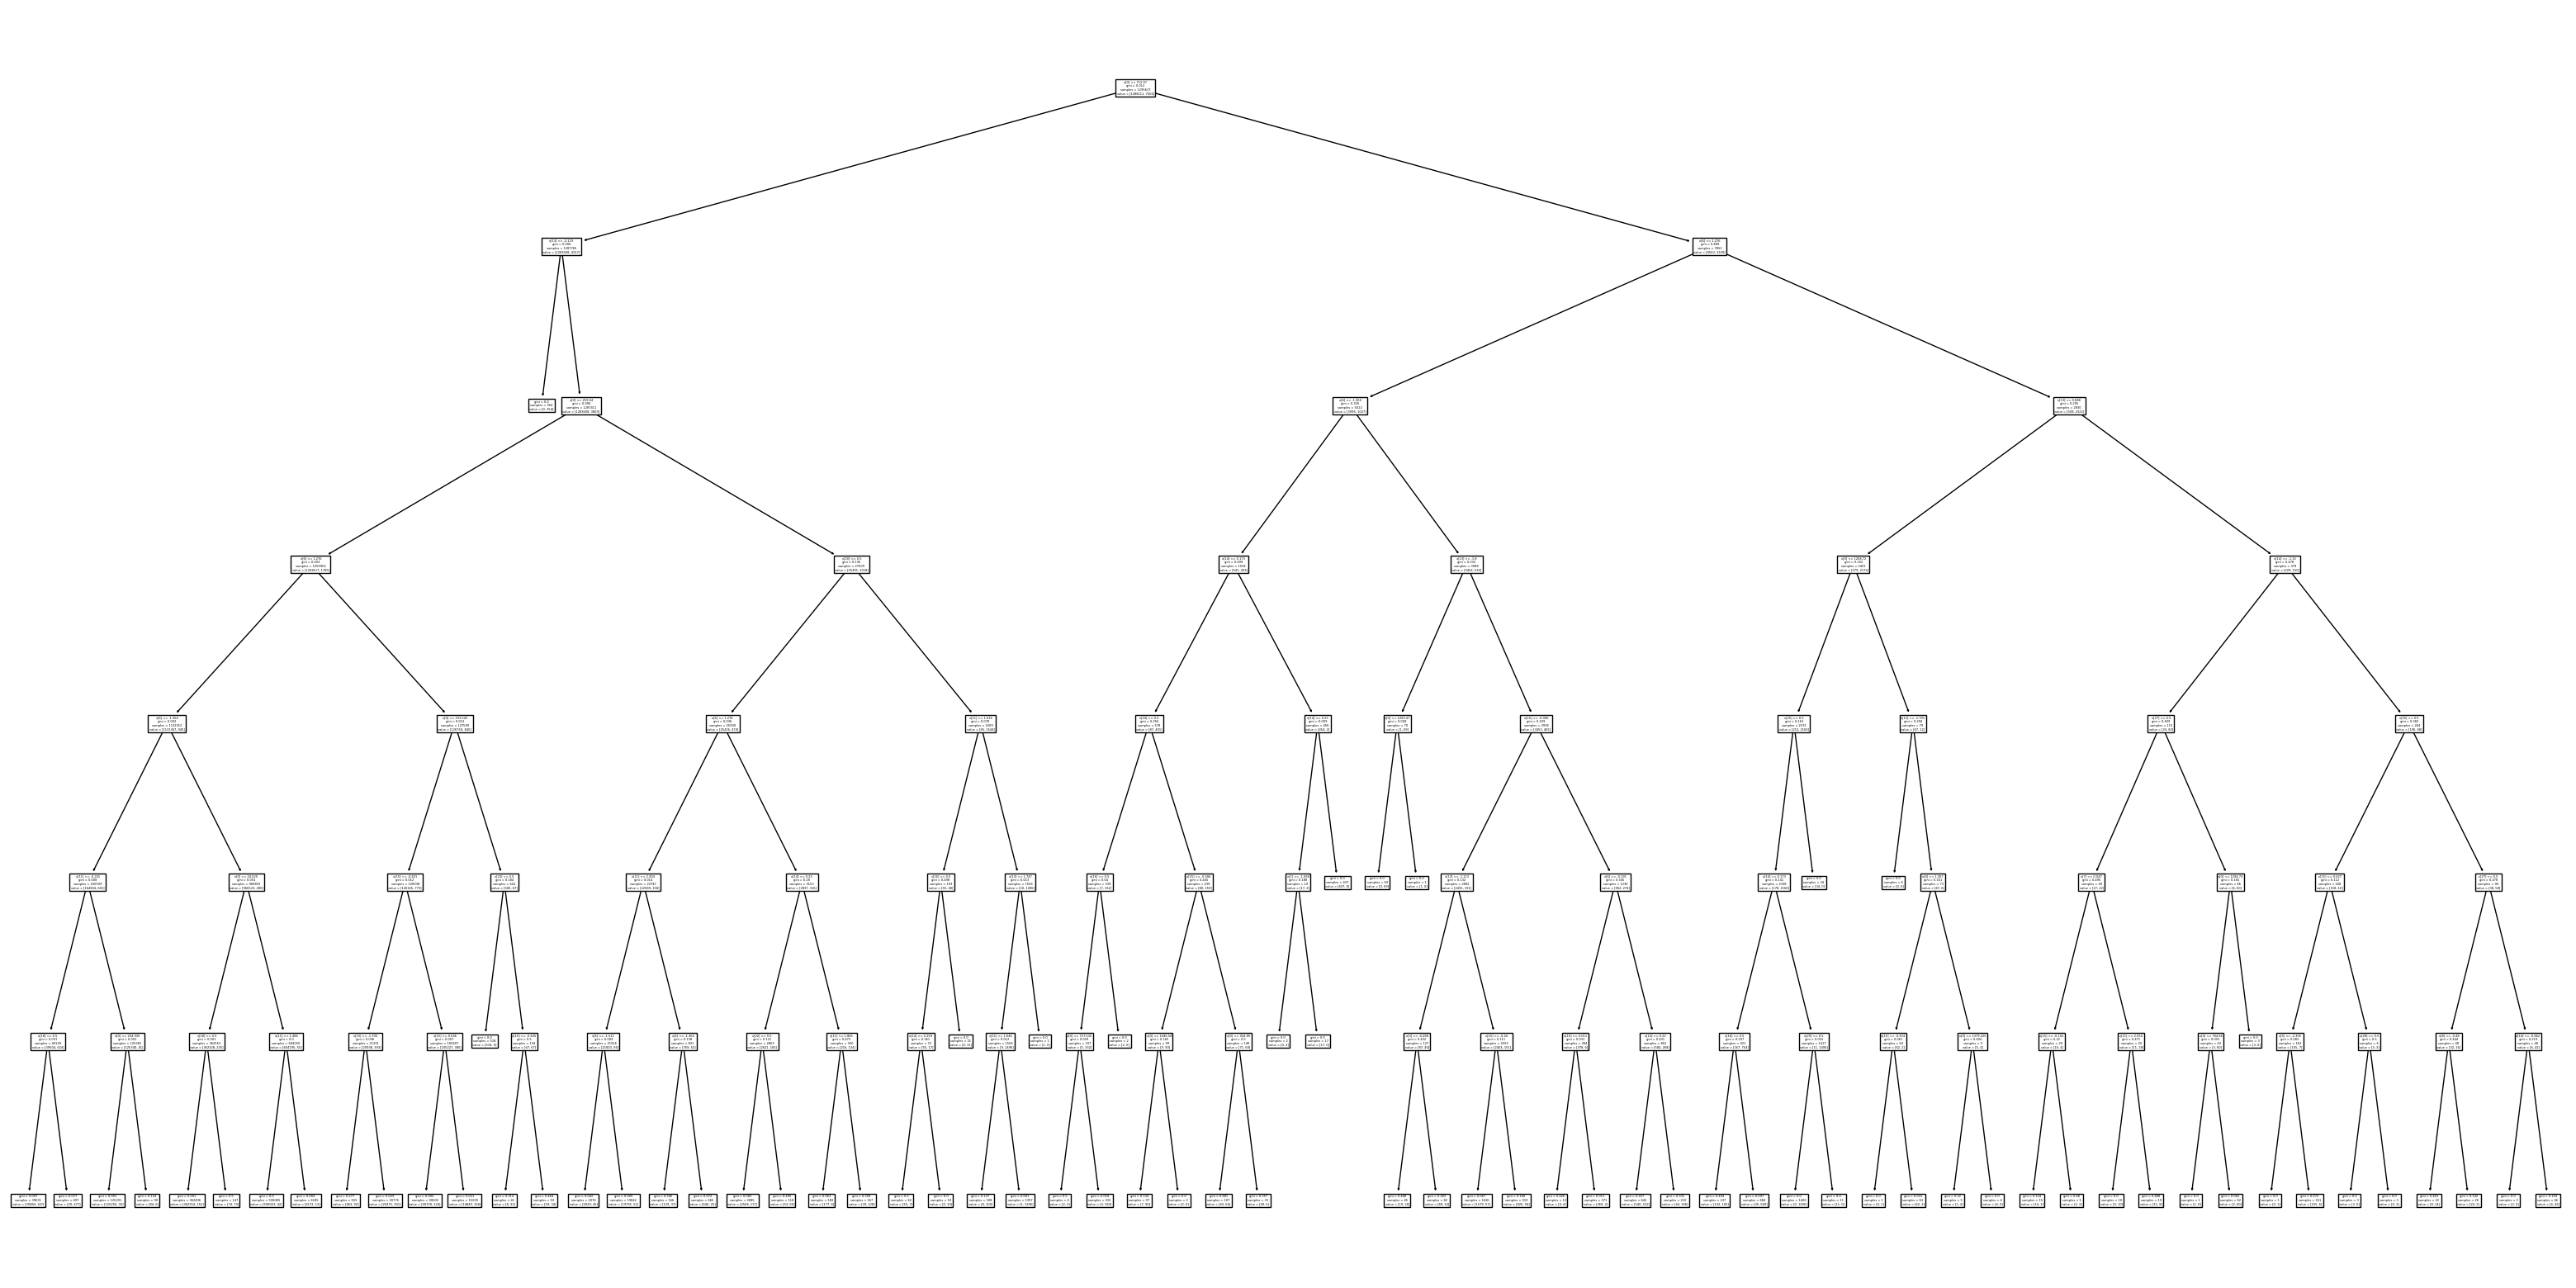

In [64]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 40,20

plot_tree(dt)

##11. Random Forest

0.42415141465380884
              precision    recall  f1-score   support

           0       1.00      0.42      0.59    553574
           1       0.01      0.86      0.01      2145

    accuracy                           0.42    555719
   macro avg       0.50      0.64      0.30    555719
weighted avg       0.99      0.42      0.59    555719



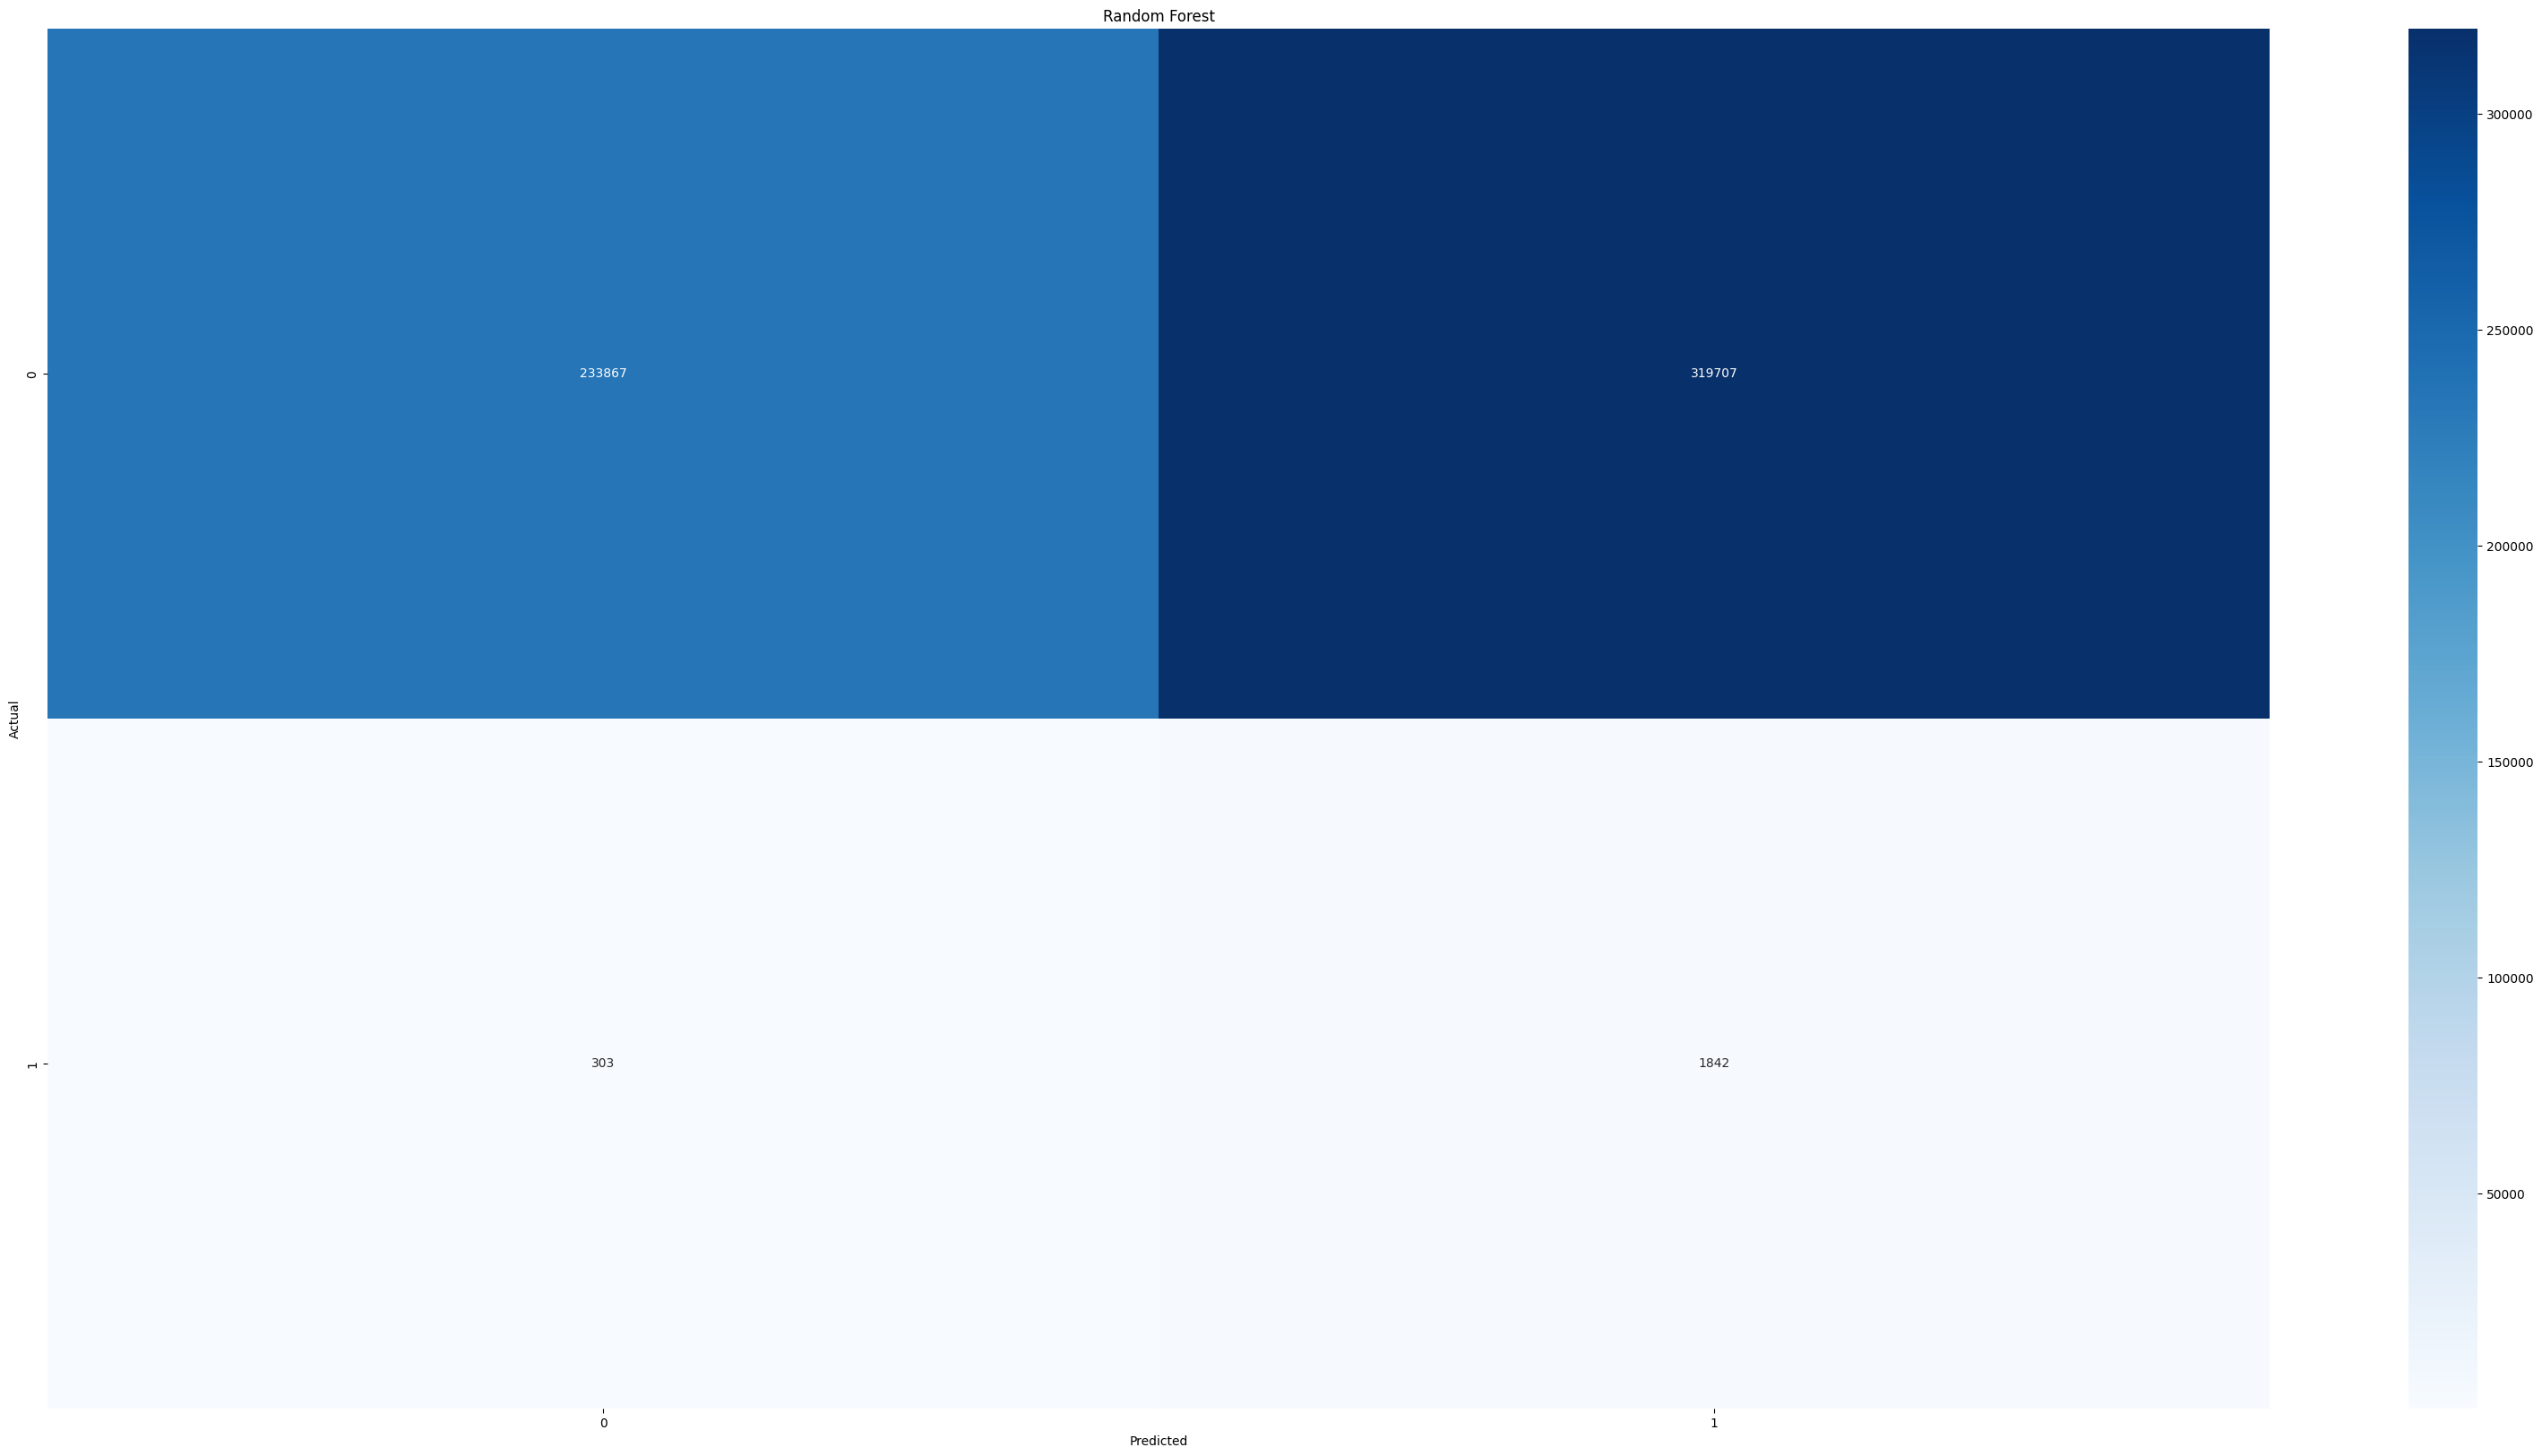

In [65]:


from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(random_state=42, max_depth=15)

rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(acc_rf)
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g')
plt.title('Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(classification_report(y_test, y_pred_rf))


##12. XGBOOST

0.9905383836075426
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.23      0.63      0.34      2145

    accuracy                           0.99    555719
   macro avg       0.62      0.81      0.67    555719
weighted avg       1.00      0.99      0.99    555719



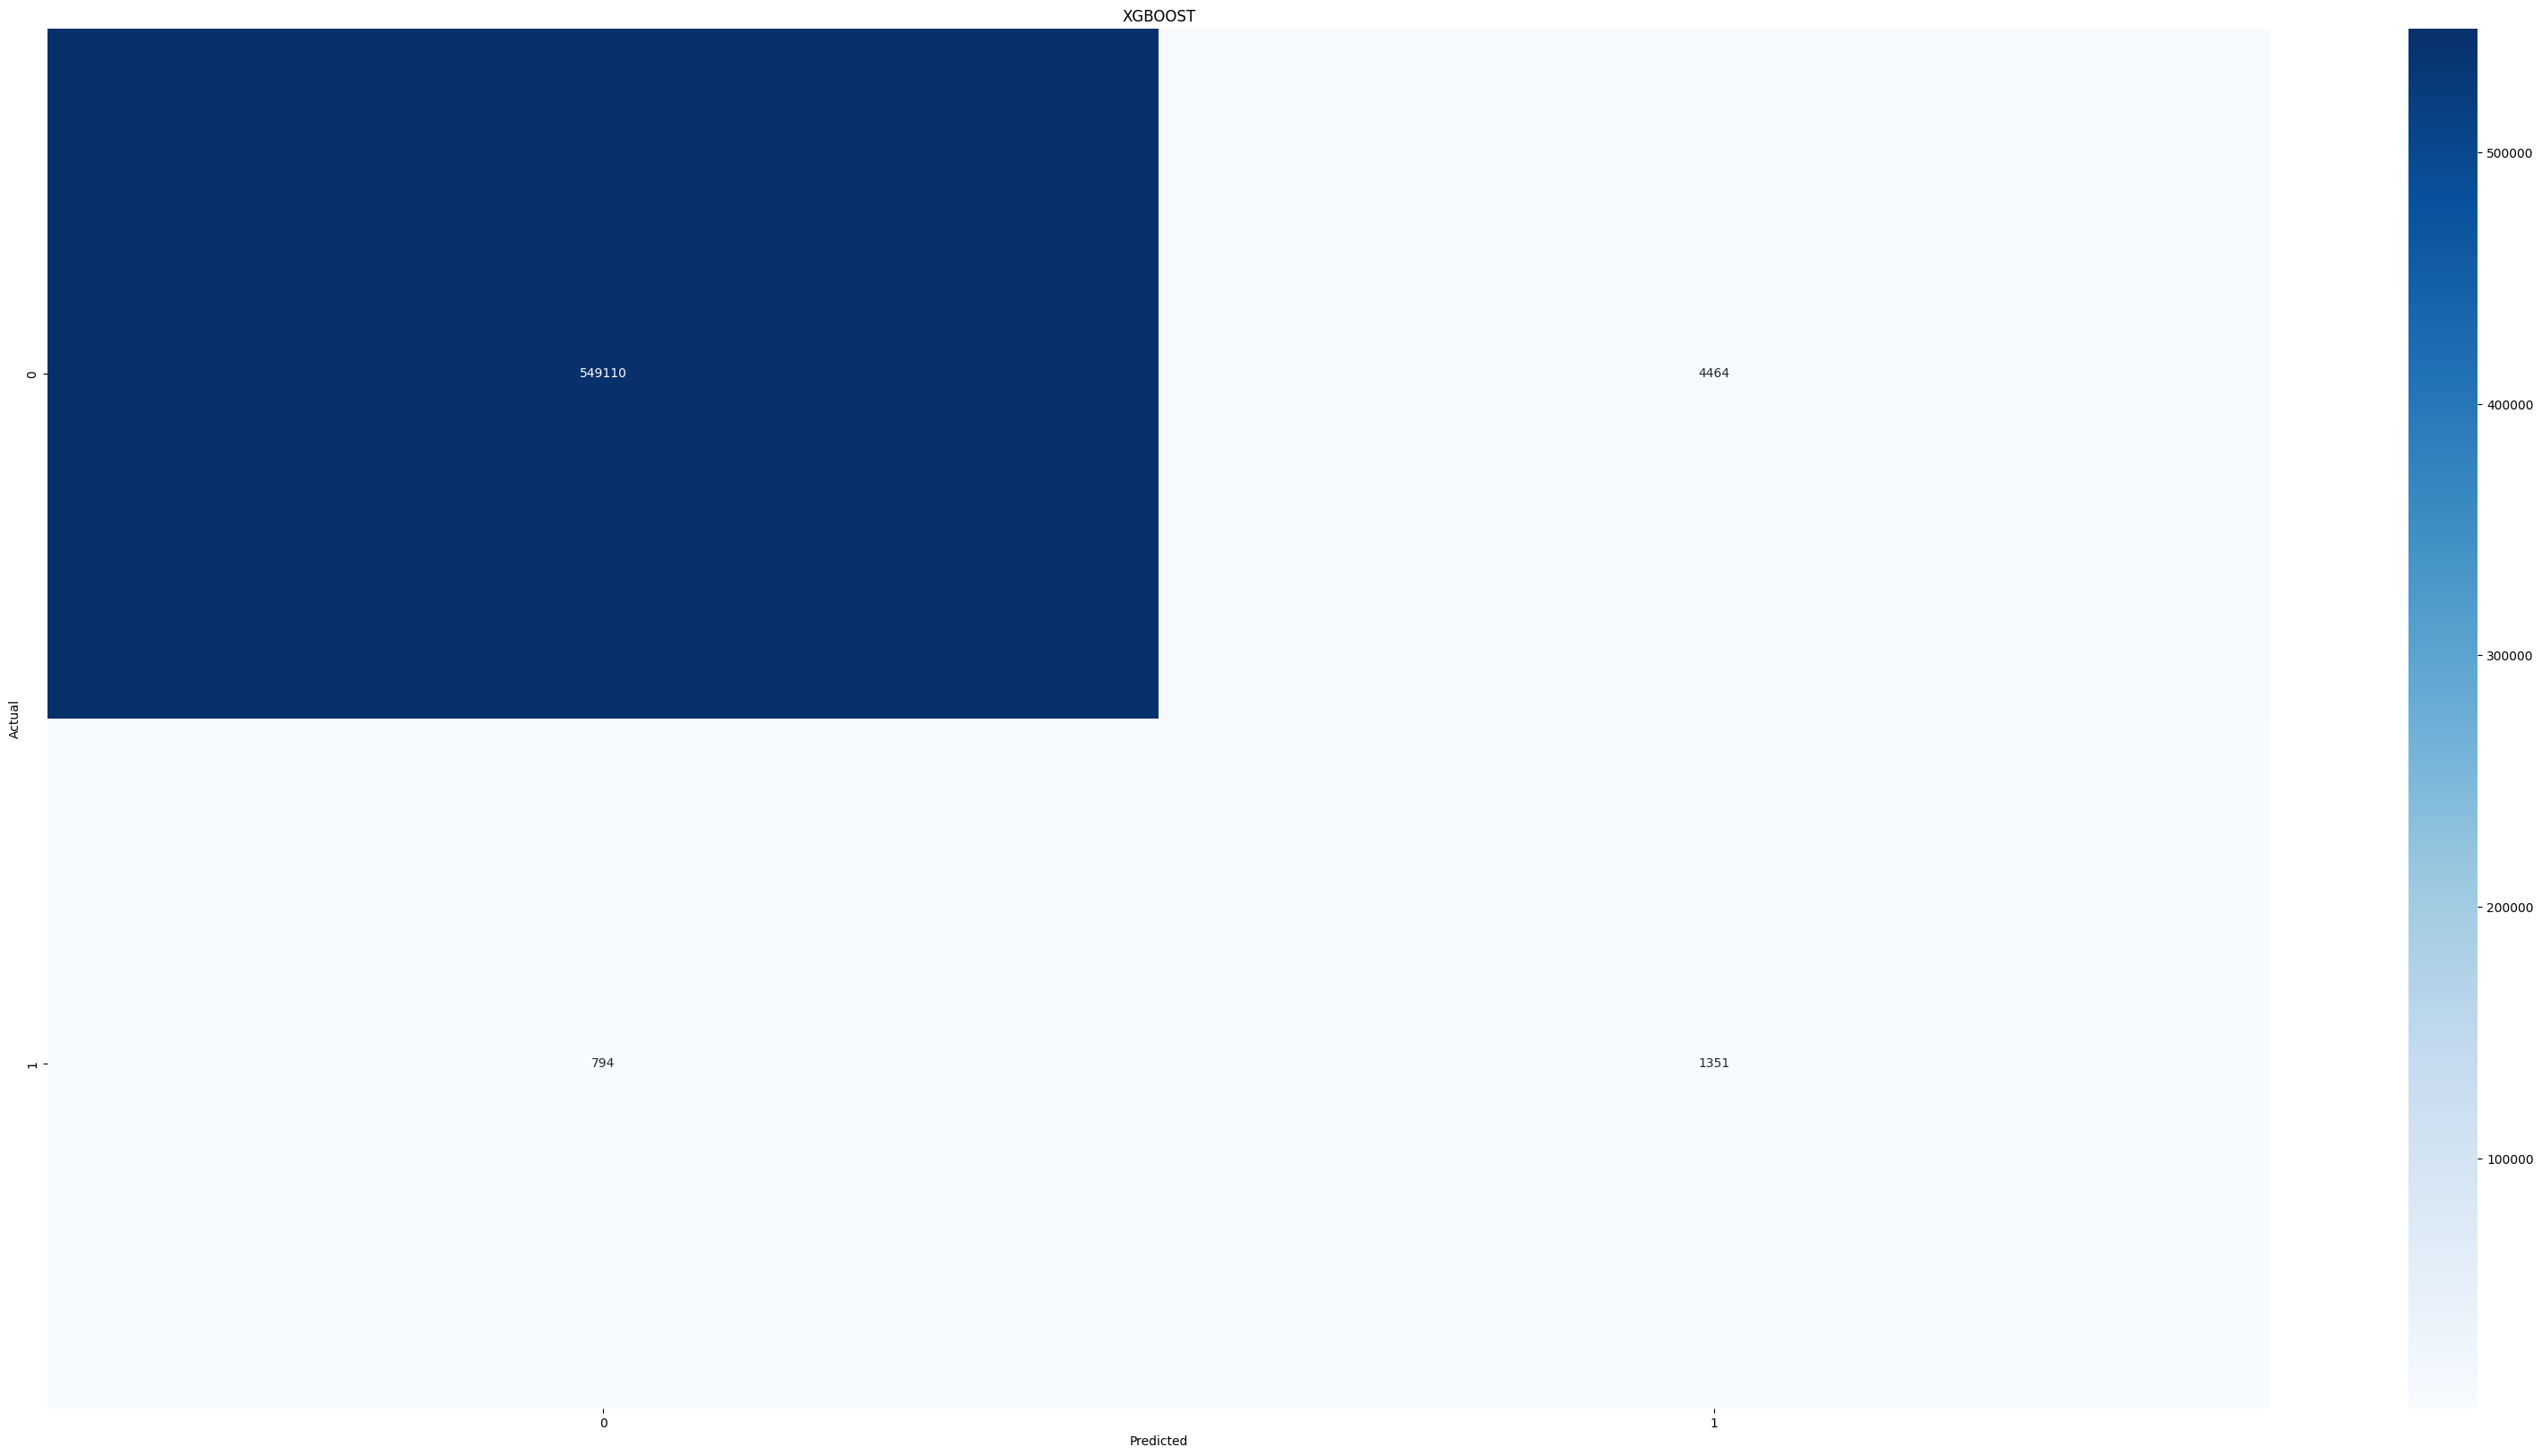

In [66]:

import matplotlib.pyplot as plt
# XGBOOST
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print(acc_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, cmap='Blues', fmt='g')
plt.title('XGBOOST')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(classification_report(y_test, y_pred_xgb))
